(start:basicsFitting)=
# Basic Curve Fitting

## Lesson overview

Analyzing measured data with a theoretical model is a common task for a scientist and engineer. Often we end up 
"fitting" a dataset to some sort of mathematical function like a line, a sinusoid wave, or an exponentially decaying 
function. The fitted parameters from this analysis often end up being related to important materials properties, 
processing conditions, or physical phenomena. 

[Least squares regression](https://en.wikipedia.org/wiki/Least_squares) is a commonly used when fitting data. You 
may have done this before in other software packages (e.g., Microsoft Excel's LINEST function). In this lesson, we 
will go over how to do basic least squares regression analysis using the [SciPy](https://scipy.org/) library. We 
first will go over how to perform a regression analysis by fitting a line through a dataset, and then we will 
demonstrate how perform curve fitting with a non-linear function. 

## Topics taught

* Performing least squares analysis using the `scipy.optimize.curve_fit()` function.
* Reporting fitting parameters and standard errors / uncertainties.
* Reading data from a file using the `numpy.loadtxt()` function.
* Plotting measured data and fit lines with the Matplotlib library.

(link:lineFit)=
## Line fitting

In this example, we will fit a line through a data set containing current-voltage measurements of an electronic 
device in order to extract the resistance of the device. As a quick review, 
[Ohm's law](https://en.wikipedia.org/wiki/Ohm%27s_law) demonstrates that there is a linear relationship between the 
voltage across a resistor and the current passing through a resistor via the equation,

$$
V = IR
$$

where $V$ is the voltage across a resistor (units: volt, V), $I$ is the current passing through a resistor (units: 
amps, A), and $R$ is the inherent electrical "resistance" of the device (units: V/A = ohm). In circuit analysis, 
electrical devices and materials are often modeled as resistors, so measuring the resistance is a common task for a 
scientist or engineer.

Data for this exercise can be found in the file 
{download}`IV_data_no_uncertainty.csv <./example_data/IV_data_no_uncertainty.csv>`. This file has two columns of 
data: (1) the sourced current and (2) measured voltage of the measurement. The first row has the labels for each 
column and the second row has the units for each column. Since this is a CSV file, each column is separated with a `,` 
symbol.

We will need to use three external libraries in order to read the data file, perform the regression analysis, and plot 
the data and fitted line. These are the [NumPy](https://numpy.org/), [SciPy](https://scipy.org/), and 
[Matplotlib](https://matplotlib.org/) libraries, respectively. Let's first load the necessary libraries for the 
analysis:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

The `import` calls for the NumPy and Matplotlib libraries should be familiar to you if you have read the 
[Introduction to Scientific Python](https://docs.cems.umn.edu/intro/intro.html) module (specially 
[the introduction to NumPy section](https://docs.cems.umn.edu/intro/Prt_01_Lssn_10_Numpy.html) and the 
[basic plotting with Matplotlib section](https://docs.cems.umn.edu/intro/Prt_01_Lssn_11_Matplotlib_Basics.html)). The 
new `import` call in this section is for the `scipy.optimize.curve_fit()` function. We will review the details of this 
function soon.

Now, we create the function we want to fit the data with, in this case a line. Recall that a line follows the 
formula, 

$$
y = mx + b
$$

where $y$ is the dependent variable in the measurement (i.e., usually what is measured), $x$ is the independent 
variable (i.e., usually what is sourced), $m$ is the slope of the line, and $b$ is the $y$-intercept (i.e., the $y$ 
value when $x$ = 0). The function call below creates a creates our line that will be fitted soon:

In [2]:
def linearFunc(x, intercept, slope):
    y = intercept + slope * x
    return y

Now let's load our data from `IV_data_no_uncertainty.csv` using the `numpy.loadtxt()` function. We have demonstrated 
how to use this function before in our 
[Introduction to Scientific Python module's section on working with CSV files](https://docs.cems.umn.edu/intro/Prt_01_Lssn_07_Scripting_Libraries_and_files.html#reading-a-csv-file-with-the-numpy-library).
The code below loads the data to a NumPy data array called `data1` and prints out the entire array to the shell just 
to confirm it has been loaded correctly:

In [3]:
data1 = np.loadtxt("./example_data/IV_data_no_uncertainty.csv", 
                   delimiter = ",", 
                   skiprows = 2)
print(data1)

[[1.00e-03 3.20e-01]
 [2.00e-03 6.70e-01]
 [3.00e-03 9.20e-01]
 [4.00e-03 1.33e+00]
 [5.00e-03 1.64e+00]
 [6.00e-03 2.12e+00]]


Notice the `skiprows=2` argument prevents NumPy from trying to load the header rows in the CSV file to data 
array. Failure to do so would cause the following `ValueError`:

In [4]:
data_bad_import = np.loadtxt("./example_data/IV_data_no_uncertainty.csv", 
                   delimiter = ",")
print(data_bad_import)

ValueError: could not convert string '\ufeffI' to float64 at row 0, column 1.

Now let's create two variables to hold the current and voltage data values:

In [5]:
current = data1[:, 0]
voltage = data1[:, 1]

With the data now loaded, let's perform the least squares fit. The line of code below performs the least squares fit:

In [6]:
popt, pcov = curve_fit(linearFunc, current, voltage)

Notice the three positional arguments: `linearFunc`, `current`, and `voltage`. As detailed in the online documentation 
for [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), 
the first positional argument is the model function to fit with, which in our case is our `linearFunc` function from 
earlier. The second positional argument is our independent variable data `current` (i.e., the "*x*" value in the data; 
called`xdata` in the 
[documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)). 
The final positional value is our dependent variable data `voltage` (i.e., the "*y*" value in the data; 
called `ydata` in the 
[documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)). There are many 
additional keyword arguments that can be used, but for this basic tutorial, these will suffice.

In our call of `scipy.optimize.curve_fit()` we return two variables: `popt` and `pcov`. According to the
[documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), `popt` is a 1D 
array that contains the optimized fitted parameters and `pcov` is a 2D array that contains the variances and 
covariances of the fitted parameters. For our needs, the square root of the diagonal represents the standard errors 
of the fitted parameters (a.k.a. the standard uncertainties of each parameter).

Let's now extract the fitting parameters and their standard uncertainties with the following block of code:

In [7]:
intercept = popt[0]
slope = popt[1]
intercept_err = np.sqrt(pcov[0][0])
slope_err = np.sqrt(pcov[1][1])

With this block of code, we have all we need in the regression analysis! For completion, let's make a plot that shows 
the optimized line with our data. The code below goes over all the necessary steps to make this 
happen. If you need a review on the basics of plotting, look at our
[Introduction to Scientific Python module's section on basic plotting with Matplotlib](https://docs.cems.umn.edu/intro/Prt_01_Lssn_11_Matplotlib_Basics.html).

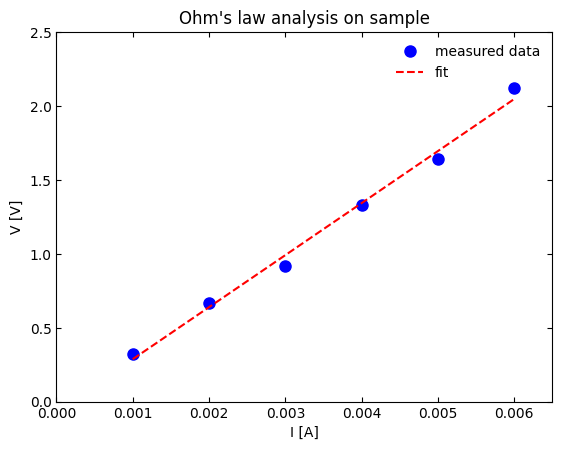

In [8]:
# Create figure
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# Plot measured data
ax.plot(current, voltage,
        label="measured data",
        marker="o",
        markersize=8,
        linestyle="none",
        color="blue")

# Create fitted line
yfit = intercept + slope * current

# Plot fit data
ax.plot(current, yfit, 
        color="red",
        label="fit",
        linestyle="dashed")

# Figure options
ax.set_title("Ohm's law analysis on sample")
ax.set_xlabel("I [A]")
ax.set_ylabel("V [V]")
ax.tick_params(axis="both", direction="in")
ax.tick_params(top="on")
ax.tick_params(right="on")
ax.set_xlim(left=0, right=6.5E-3)
ax.set_ylim(bottom=0, top=2.5)
ax.legend(frameon=False)

# Show plot
plt.show()

Comments have been provided in the code above for readability. To create the fit line, we first create `yfit`, which 
contains calculated voltages based on our input `current` array and the fitting results `intercept` and `slope` (notice 
the line equation format). We then include this data set to the graph as an overlay.

Finally, we can also report the fitting results to the shell with a set of four `print()` calls. Here, we use 
[f-formatting of strings](https://docs.cems.umn.edu/intro/Prt_01_Lssn_04_Using_Strings_and_Print%28%29.html#f-formatting-of-strings) 
and [number rounding in strings](https://docs.cems.umn.edu/intro/Prt_01_Lssn_04_Using_Strings_and_Print%28%29.html#digit-precision) 
to readability purposes.

In [9]:
print(f"intercept = {intercept:.3f} V")
print(f"intercept std. error = {intercept_err:.3f} V")
print(f"slope = {slope:.1f} ohm")
print(f"slope std. error = {slope_err:.1f} ohm")

intercept = -0.065 V
intercept std. error = 0.058 V
slope = 352.0 ohm
slope std. error = 14.9 ohm


(link:nonlinearFit)=
## Non-linear curve fitting

We can also use `scipy.optimize.curve_fit()` to fit datasets that do not have a linear relationship. In order to 
perform "non-linear curve fitting", we simply need to rewrite our function to our desired mathematical relationship 
and account for all additional fit parameters in the code. To see this in action, first download the CSV file 
{download}`MR_data_no_uncertainty.csv <./example_data/MR_data_no_uncertainty.csv>`, which contains a set of measured 
data from a sample whose electrical resistance changes as function of magnetic field. This data will show a 
second-order polynomial-like dependence (i.e., a parabola) that follows the functional form:

$$
y = A + Bx + Cx^2
$$

where $A$ is a constant, $B$ is the linear parameter, and $C$ is the second-order or "quadratic" term. The block of 
code below is the entire code needed to fully run this regression analysis:

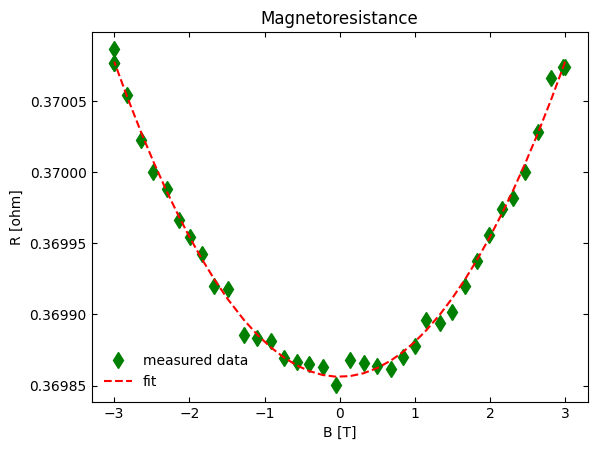

constant = 0.3698562 ohm
constant std. error = 0.0000014 ohm
linear = -1.19E-08 ohm/T
linear std. error = 5.02E-07 ohm/T
quadratic = 2.4583E-05 ohm/T^2
quadratic std. error = 3.04E-07 ohm/T^2


In [10]:
# Load libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

# Create function to fit
def parabolaFunc(x, constant, linear, quadratic):
    y = constant + linear * x + quadratic * (x**2)
    return y

# Load data and separate columns
data2 = np.loadtxt("./example_data/MR_data_no_uncertainty.csv", 
                   delimiter = ",", 
                   skiprows = 2)
magnetic_field = data2[:,0]
resistance = data2[:,1]

# Perform the least-squares fitting
popt, pcov = curve_fit(parabolaFunc, magnetic_field, resistance)

# Extract out the fitted parameters and standard errors
constant = popt[0]
linear = popt[1]
quadratic = popt[2]
constant_err = np.sqrt(pcov[0][0])
linear_err = np.sqrt(pcov[1][1])
quadratic_err = np.sqrt(pcov[2][2])

# Create figure
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# Plot measured data
ax.plot(magnetic_field, resistance,
        label="measured data",
        marker="d",
        markersize=8,
        linestyle="none",
        color="green")

# Create fitted curve
yfit = constant + (linear * magnetic_field) + (quadratic * (magnetic_field**2))

# Plot fit data
ax.plot(magnetic_field, yfit, 
        color="red",
        label="fit",
        linestyle="dashed")

# Figure options
ax.set_title("Magnetoresistance")
ax.set_xlabel("B [T]")
ax.set_ylabel("R [ohm]")
ax.tick_params(axis="both", direction="in")
ax.tick_params(top="on")
ax.tick_params(right="on")
#ax.set_xlim(left=0, right=2.5)
#ax.set_ylim(bottom=0.3525, top=0.3535)
ax.legend(frameon=False)

# Show plot
plt.show()

# Report values to shell
print(f"constant = {constant:.7f} ohm")
print(f"constant std. error = {constant_err:.7f} ohm")
print(f"linear = {linear:.2E} ohm/T")
print(f"linear std. error = {linear_err:.2E} ohm/T")
print(f"quadratic = {quadratic:.4E} ohm/T^2")
print(f"quadratic std. error = {quadratic_err:.2E} ohm/T^2")

We have reloaded the three external libraries completeness in case you would like to re-use this code block for your own 
needs. Structurally, there is no real difference from the previous line fitting example. The only differences in the 
code are replacing our linear function `linearFunc()` with the polynomial function `parabolaFunc()`, renaming the
variables for the measured data, and adjusting the code to handle the new fitting parameters. In short, once you know 
how to perform the line fit, you can fit any other function!

## Conclusion

Hopefully you find this lesson useful in learning the basics of curve fitting. The `scipy.optimize.curve_fit()` 
function has additional optional arguments available that go beyond the scope of this lesson. 

For example, we can use the keyword argument `sigma` to account for any uncertainty on the *y*-value for each 
data point in the regression analysis. This way if our data has "error bars" on the *y*-value for each data point, 
we can include this in the fitting process. We will cover this in an [upcoming lesson](link:curve_fit_unc). There are 
also ways to enter initial values for each fitting parameter and specify bounds for each value. If you are 
interested in this additional options, please look at the 
[documentation for curve_fit()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

## Want to learn more?

[Wikipedia - Least Squares](https://en.wikipedia.org/wiki/Least_squares)  
[Shane Burns - Data Fitting](https://faculty1.coloradocollege.edu/~sburns/LinearFitting/SimpleDataFitting.html)  
[SciPy Library - The curve_fit() Function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)  
[NumPy - Documentation Page](https://numpy.org/doc/stable/)  
[Matplotlib - Home Page](https://matplotlib.org/stable/index.html)